In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

from IPython.display import set_matplotlib_formats

mpl.rc('font',family='Malgun Gothic')


mpl.rc('axes', unicode_minus = True)

set_matplotlib_formats('retina')

In [2]:
df1 = pd.read_csv('result.csv')
print(df1.shape)
df1.head()

(71, 11)


,Unnamed: 0,직종,재직여부,지역,작성시간,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부
0,0,서비스/고객지원,현직원,경기,2020. 08. 11,"""자유도가 높고 엔지니어의 역량을 펼칠수 있는곳""","재택근무!!!! (코로나시즌) 연차 촉진, block leave, 자유로운 분위기,...","하이레벨로 갈수록 스피크업이 어렵다? 보고가많다, 고객바이 고객으로 업무강도가 달라...",효율적으로 일하는 회사가 되었으면! 재택근무 계속 하게 해주세요,성장,추천
1,1,서비스/고객지원,현직원,경기,2020. 07. 21,"""반도체 제조업 CS 회사중에서는 수준급, 그러나 업계 자체에 한계가 있음""",최고의 기술력을 보유한 회사. 워라벨 및 급여 나쁘지 않습니다,기술력을 갖춘 회사이지만 ASML KOREA 는 연구개발을 하는 곳이 아니라 cus...,엔지니어를 홀대하는 문화가 만연합니다. 기술을 가진 엔지니어를 대우하는 회사였으면 ...,성장,추천
2,2,생산/제조,전직원,경기,2020. 07. 07,"""사회초년생에 고액연봉자 타이틀을 갖기 위한 목적이라면 강추, 그만큼 연봉은 쎄다(...","장비의 현상유지가 주 업무이기 때문에, 본인의 일만 잘하면 터치 받지 않음. 또한 ...",야간 근무가 체질상 맞지 않는 사람은 고됨. 3일 쉬어도 3일 쉬는게 아님,반도체 산업의 리더로서 자긍심을 더욱 가질 수 있도록 직원들을 격려 해줬으면 함,성장,추천
3,3,경영/기획/컨설팅,현직원,경기,2020. 07. 01,"""복지 좋고 기업 문화가 좋은 곳 글로벌 기업으로 다양한 사람들과 일할 수 있는 기...",복지가 우선적으로 좋습니다. 수평적인 분위기로 경직되지 않은 문화,야근이 있는 편이며 본사 확인이 필요한 건으로 인한 업무 지연 많음,업무지연에 대한 문제에 대해 해결책이 마련 되었으면 좋겠습니다,성장,추천
4,4,서비스/고객지원,현직원,경기,2020. 06. 30,"""반도체 회사인데 IT회사처럼 근무할 수 있는 그런 퀄리티 높은 업무를 맡을 수 있음.""","너무 자유롭고 수평적인 분위기. 높은 연봉. 물론 모든 건 부서, 업무에 따라 다름.",복지 혜택에 있어서는 많이 부족하다고 느낌. 그냥 깡 돈만 많이 주는 느낌.,직원들의 복지 혜택을 많이 늘려줬으면 좋겠음. 연봉 외에도 만족할 부분이 많아져야 함.,성장,추천


# 자연어 처리 

In [3]:
import konlpy
from konlpy.tag import Okt

In [4]:
okt = Okt()

In [5]:
pos_data = pd.DataFrame(okt.pos(df1['한줄평'].values.tolist()[0]))
pos_data.head(10)

,0,1
0,"""",Punctuation
1,자유도,Noun
2,가,Josa
3,높고,Adjective
4,엔지니어,Noun
5,의,Josa
6,역량,Noun
7,을,Josa
8,펼칠수,Verb
9,있는,Adjective


In [6]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['한줄평'])) :
    dfn =  pd.DataFrame(okt.pos(df1['한줄평'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns={0:'형태소',1:'품사'})

In [7]:
df_Pos.shape

(1472, 2)

In [8]:
df_Pos['품사'].value_counts()

Noun              607
Josa              247
Punctuation       213
Adjective         144
Verb              137
Suffix             47
Adverb             20
Modifier           13
Number             12
Alpha               9
Foreign             9
Conjunction         7
VerbPrefix          4
KoreanParticle      1
Exclamation         1
Determiner          1
Name: 품사, dtype: int64

**빈도수가 가장 많은 명사**

In [9]:
cond1 = (df_Pos['품사']=='Noun')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
df_N.head()

(607, 2)


,형태소,품사
1,자유도,Noun
4,엔지니어,Noun
6,역량,Noun
10,곳,Noun
1,반도체,Noun


# 워드 클라우드

!pip install --user wordcloud 

In [10]:
from wordcloud import WordCloud, STOPWORDS

**한줄평 워드클라우드**

In [11]:
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600).generate(' '.join(df_N['형태소']))

In [13]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='Malgun.ttf').generate(' '.join(df_N['형태소']))

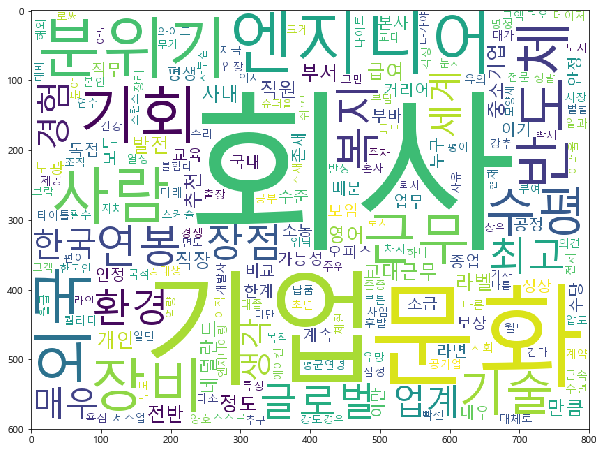

In [14]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

**단점 워드클라우드**

In [15]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['기업단점'])) :
    dfn =  pd.DataFrame(okt.pos(df1['기업단점'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns={0:'형태소',1:'품사'})

In [16]:
cond1 = (df_Pos['품사']=='Noun')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
df_N.head()

(874, 2)


,형태소,품사
0,하이,Noun
1,레벨,Noun
3,갈수록,Noun
4,스피크업,Noun
8,보고,Noun


In [17]:
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600).generate(' '.join(df_N['형태소']))

In [18]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='Malgun.ttf').generate(' '.join(df_N['형태소']))

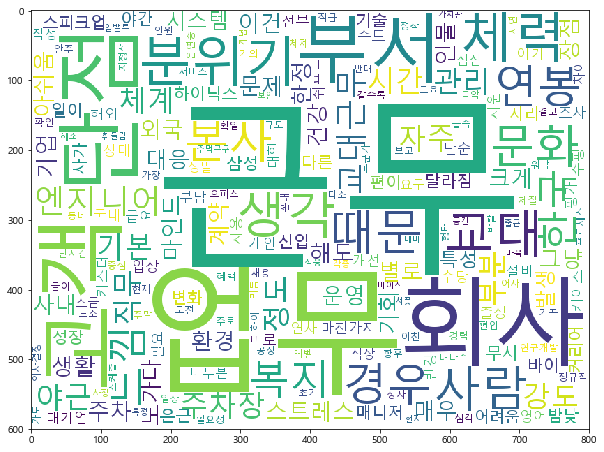

In [19]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

**장점 워드 클라우드**

In [20]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['기업장점'])) :
    dfn =  pd.DataFrame(okt.pos(df1['기업장점'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns={0:'형태소',1:'품사'})

In [21]:
cond1 = (df_Pos['품사']=='Noun')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
df_N.head()

(930, 2)


,형태소,품사
0,재택근무,Noun
3,코로나,Noun
4,시즌,Noun
6,연차,Noun
7,촉진,Noun


In [22]:
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600).generate(' '.join(df_N['형태소']))

In [23]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='Malgun.ttf').generate(' '.join(df_N['형태소']))

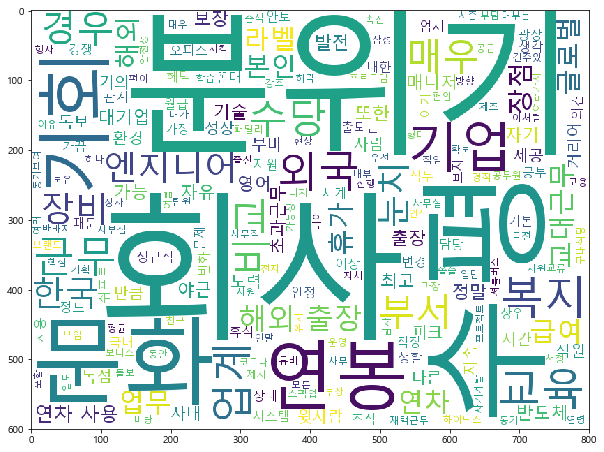

In [24]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

**형용사 워드클라우드**

In [25]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['한줄평'])) :
    dfn =  pd.DataFrame(okt.pos(df1['한줄평'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns={0:'형태소',1:'품사'})

In [26]:
cond1 = (df_Pos['품사']=='Adjective')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
df_N.head()

(144, 2)


,형태소,품사
3,높고,Adjective
9,있는,Adjective
16,있음,Adjective
21,쎄다,Adjective
2,좋고,Adjective


In [27]:
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600).generate(' '.join(df_N['형태소']))

In [28]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='Malgun.ttf').generate(' '.join(df_N['형태소']))

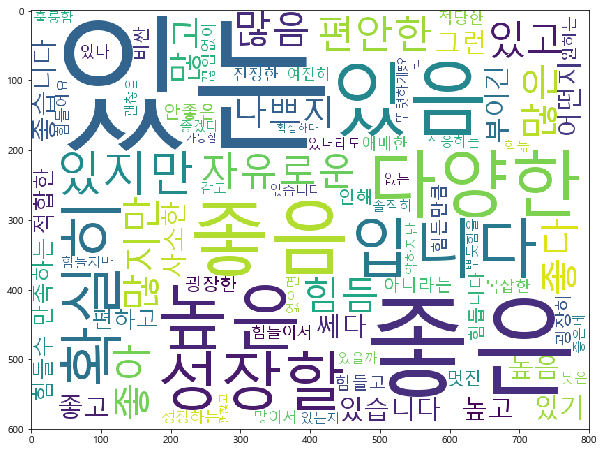

In [29]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

**기업 단점 워드클라우드(형용사)**

In [30]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['기업단점'])) :
    dfn =  pd.DataFrame(okt.pos(df1['기업단점'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns={0:'형태소',1:'품사'})

In [31]:
cond1 = (df_Pos['품사']=='Adjective')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
df_N.head()

(212, 2)


,형태소,품사
6,어렵다,Adjective
10,많다,Adjective
24,심함,Adjective
14,아니라,Adjective
20,입니다,Adjective


In [32]:
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600).generate(' '.join(df_N['형태소']))

In [33]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='Malgun.ttf').generate(' '.join(df_N['형태소']))

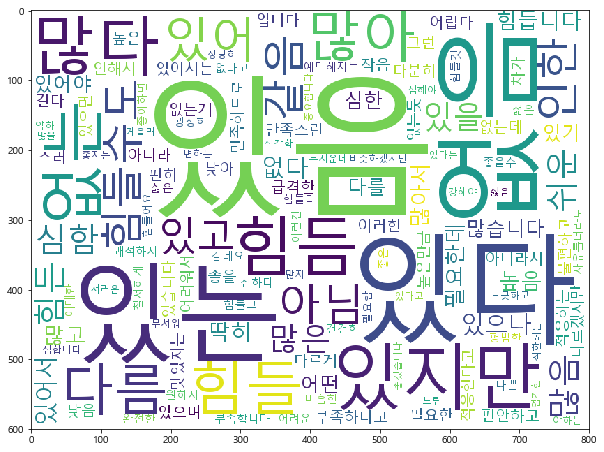

In [34]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

1. okt 공식 문서를 참고해서 사용사 사전을 추가합니다.
2. okt를 패키징하고, konlpy에서 사용할 수 있도록 konlpy/java 경로에 jar 파일을 복사합니다.
   (konlpy는 소스를 받아 사용합니다.)
3. 기존에 참고하고 있던 okt.jar 대신 새로운 okt.jar를 사용하도록 설정합니다.
4. konlpy 소스 경로를 import 해서 형태소 분석을 합니다.

* okt 공식문서: https://github.com/open-korean-text/open-korean-text/blob/master/docs/contribution-guide.md
* 정리 내용: hexists/test_konlpy#2